In [2]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
#from sb3_contrib import RecurrentPPO

#from stable_baselines.common.vec_env import DummyVecEnv
#from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data/results.csv')
df.columns = df.columns.str.title()

In [4]:
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [5]:
df = df.loc[df.Ticker == 'NVDA',cols]
df

,Date,Open,High,Low,Close,Volume
0,2021-04-12,143.4250,143.4250,143.4250,143.4250,620.0
1,2021-04-12,143.4750,143.4750,143.1875,143.2500,2708.0
2,2021-04-12,143.1875,143.7500,143.1875,143.7500,14176.0
3,2021-04-12,143.7500,143.7500,143.4975,143.5000,21356.0
4,2021-04-12,143.3950,144.1225,141.9200,142.3975,3274688.0
...,...,...,...,...,...,...
7998,2023-04-06,269.7400,270.7800,269.2000,270.3400,5011915.0
7999,2023-04-06,270.3700,270.5000,268.5557,270.2100,1203194.0
8000,2023-04-06,270.1946,270.4000,270.1700,270.3300,27828.0
8001,2023-04-07,270.2700,270.4000,270.2000,270.3700,22898.0


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [7]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-04-12,143.4250,143.4250,143.4250,143.4250,620.0
2021-04-12,143.4750,143.4750,143.1875,143.2500,2708.0
2021-04-12,143.1875,143.7500,143.1875,143.7500,14176.0
2021-04-12,143.7500,143.7500,143.4975,143.5000,21356.0
2021-04-12,143.3950,144.1225,141.9200,142.3975,3274688.0


In [65]:
timesteps = 6

In [66]:
env = gym.make('stocks-v0', df=df, frame_bound=(timesteps,7900), window_size=timesteps)

In [67]:
#env.signal_features

In [68]:
env.action_space

Discrete(2)

In [69]:
state = env.reset()
state

array([[ 1.432500e+02, -1.750000e-01],
       [ 1.437500e+02,  5.000000e-01],
       [ 1.435000e+02, -2.500000e-01],
       [ 1.423975e+02, -1.102500e+00],
       [ 1.422950e+02, -1.025000e-01],
       [ 1.427500e+02,  4.550000e-01]])

In [70]:
action = env.action_space.sample()
action

0

In [71]:
n_state, reward, done, info = env.step(action)
print(n_state, reward, done, info)

[[ 1.437500e+02  5.000000e-01]
 [ 1.435000e+02 -2.500000e-01]
 [ 1.423975e+02 -1.102500e+00]
 [ 1.422950e+02 -1.025000e-01]
 [ 1.427500e+02  4.550000e-01]
 [ 1.483223e+02  5.572300e+00]] 0 False {'total_reward': 0.0, 'total_profit': 1.0, 'position': 0}


info {'total_reward': -18.20359999999978, 'total_profit': 1.7206275849403703e-13, 'position': 0}


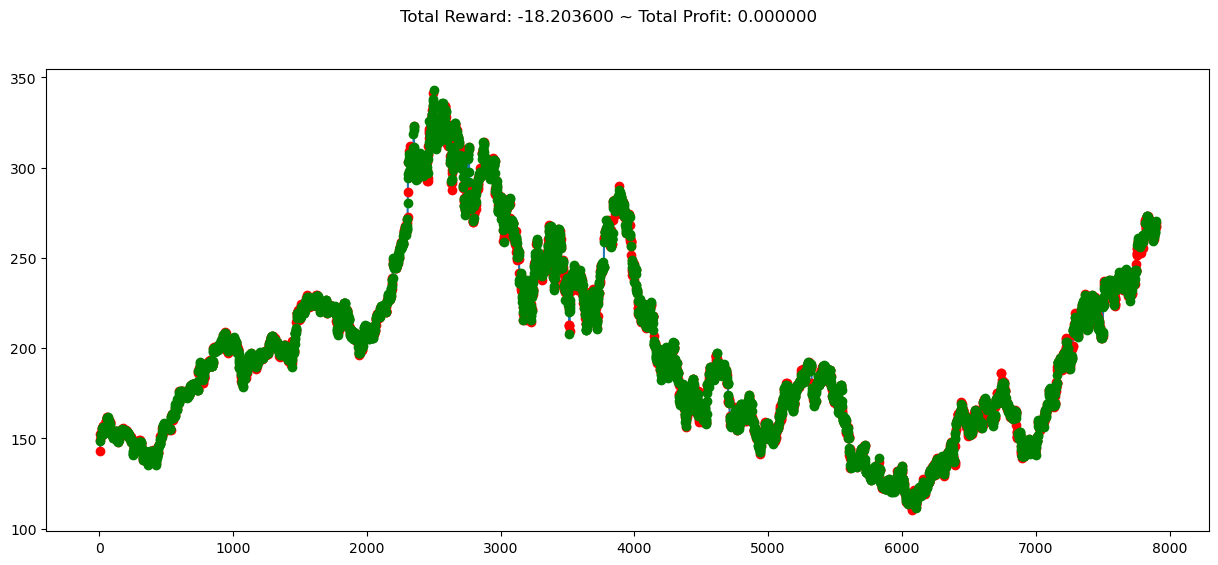

In [72]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [73]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(timesteps,7900), window_size=timesteps)
env = DummyVecEnv([env_maker])

In [74]:
#model = A2C('MlpLstmPolicy', env, verbose=1) 

model = PPO('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2474 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1619          |
|    iterations           | 2             |
|    time_elapsed         | 2             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00067722204 |
|    clip_fraction        | 0.0062        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.683        |
|    explained_variance   | -0.000543     |
|    learning_rate        | 0.0003        |
|    loss                 | 2.56          |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00125      |
|    value_loss           | 5.15          |
-------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 1222         |
|    iterations           | 13           |
|    time_elapsed         | 21           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0031398756 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.689       |
|    explained_variance   | 0.00414      |
|    learning_rate        | 0.0003       |
|    loss                 | 3.84         |
|    n_updates            | 120          |
|    policy_gradient_loss | 7.25e-05     |
|    value_loss           | 8.65         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1221        |
|    iterations           | 14          |
|    time_elapsed         | 23          |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 1195         |
|    iterations           | 24           |
|    time_elapsed         | 41           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0043987026 |
|    clip_fraction        | 0.0359       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.545       |
|    explained_variance   | -0.00861     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.88         |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00212     |
|    value_loss           | 3.43         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1192         |
|    iterations           | 25           |
|    time_elapsed         | 42           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1061         |
|    iterations           | 35           |
|    time_elapsed         | 67           |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0032115122 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.55        |
|    explained_variance   | 0.011        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.71         |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00109     |
|    value_loss           | 4.09         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1042        |
|    iterations           | 36          |
|    time_elapsed         | 70          |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 1036         |
|    iterations           | 46           |
|    time_elapsed         | 90           |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0035568927 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.608       |
|    explained_variance   | 1.08e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 5.55         |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.000908    |
|    value_loss           | 11.3         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1039         |
|    iterations           | 47           |
|    time_elapsed         | 92           |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 1058        |
|    iterations           | 57          |
|    time_elapsed         | 110         |
|    total_timesteps      | 116736      |
| train/                  |             |
|    approx_kl            | 0.007113327 |
|    clip_fraction        | 0.0214      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 11.3        |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.00137    |
|    value_loss           | 24.9        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1060        |
|    iterations           | 58          |
|    time_elapsed         | 112         |
|    total_timesteps      | 118784

-----------------------------------------
| time/                   |             |
|    fps                  | 1077        |
|    iterations           | 68          |
|    time_elapsed         | 129         |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.014754715 |
|    clip_fraction        | 0.0493      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.668      |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 8.18        |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.00431    |
|    value_loss           | 20.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1078        |
|    iterations           | 69          |
|    time_elapsed         | 131         |
|    total_timesteps      | 141312

-----------------------------------------
| time/                   |             |
|    fps                  | 1091        |
|    iterations           | 79          |
|    time_elapsed         | 148         |
|    total_timesteps      | 161792      |
| train/                  |             |
|    approx_kl            | 0.006801027 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.571      |
|    explained_variance   | 0.0179      |
|    learning_rate        | 0.0003      |
|    loss                 | 3.11        |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.000367   |
|    value_loss           | 6.35        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1092         |
|    iterations           | 80           |
|    time_elapsed         | 149          |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 1101          |
|    iterations           | 90            |
|    time_elapsed         | 167           |
|    total_timesteps      | 184320        |
| train/                  |               |
|    approx_kl            | 0.00013227476 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.569        |
|    explained_variance   | 0.0541        |
|    learning_rate        | 0.0003        |
|    loss                 | 6.96          |
|    n_updates            | 890           |
|    policy_gradient_loss | 6.7e-05       |
|    value_loss           | 11.8          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1102         |
|    iterations           | 91           |
|    time_elapsed         | 169     

------------------------------------------
| time/                   |              |
|    fps                  | 1110         |
|    iterations           | 101          |
|    time_elapsed         | 186          |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 0.0038359608 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.485       |
|    explained_variance   | 0.0972       |
|    learning_rate        | 0.0003       |
|    loss                 | 10.9         |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.000145    |
|    value_loss           | 15.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1111         |
|    iterations           | 102          |
|    time_elapsed         | 187          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1117         |
|    iterations           | 112          |
|    time_elapsed         | 205          |
|    total_timesteps      | 229376       |
| train/                  |              |
|    approx_kl            | 0.0022114064 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.343       |
|    explained_variance   | 0.156        |
|    learning_rate        | 0.0003       |
|    loss                 | 15.6         |
|    n_updates            | 1110         |
|    policy_gradient_loss | -0.00109     |
|    value_loss           | 22.8         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1117        |
|    iterations           | 113         |
|    time_elapsed         | 207         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 1121        |
|    iterations           | 123         |
|    time_elapsed         | 224         |
|    total_timesteps      | 251904      |
| train/                  |             |
|    approx_kl            | 0.003752686 |
|    clip_fraction        | 0.0122      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.451      |
|    explained_variance   | 0.0977      |
|    learning_rate        | 0.0003      |
|    loss                 | 16.7        |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.00024    |
|    value_loss           | 33.8        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1121         |
|    iterations           | 124          |
|    time_elapsed         | 226          |
|    total_timesteps      | 2

----------------------------------------
| time/                   |            |
|    fps                  | 1126       |
|    iterations           | 134        |
|    time_elapsed         | 243        |
|    total_timesteps      | 274432     |
| train/                  |            |
|    approx_kl            | 0.00098831 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.449     |
|    explained_variance   | 0.149      |
|    learning_rate        | 0.0003     |
|    loss                 | 22.5       |
|    n_updates            | 1330       |
|    policy_gradient_loss | -0.000195  |
|    value_loss           | 45.4       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1126        |
|    iterations           | 135         |
|    time_elapsed         | 245         |
|    total_timesteps      | 276480      |
| train/  

-------------------------------------------
| time/                   |               |
|    fps                  | 1130          |
|    iterations           | 145           |
|    time_elapsed         | 262           |
|    total_timesteps      | 296960        |
| train/                  |               |
|    approx_kl            | 0.00021321344 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.394        |
|    explained_variance   | 0.165         |
|    learning_rate        | 0.0003        |
|    loss                 | 13.1          |
|    n_updates            | 1440          |
|    policy_gradient_loss | 0.000167      |
|    value_loss           | 23.7          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1130        |
|    iterations           | 146         |
|    time_elapsed         | 264         

------------------------------------------
| time/                   |              |
|    fps                  | 1135         |
|    iterations           | 156          |
|    time_elapsed         | 281          |
|    total_timesteps      | 319488       |
| train/                  |              |
|    approx_kl            | 3.116863e-05 |
|    clip_fraction        | 0.00347      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.21        |
|    explained_variance   | 0.0555       |
|    learning_rate        | 0.0003       |
|    loss                 | 5.27         |
|    n_updates            | 1550         |
|    policy_gradient_loss | 1.28e-05     |
|    value_loss           | 9.91         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1135          |
|    iterations           | 157           |
|    time_elapsed         | 283           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 1137         |
|    iterations           | 167          |
|    time_elapsed         | 300          |
|    total_timesteps      | 342016       |
| train/                  |              |
|    approx_kl            | 0.0007943305 |
|    clip_fraction        | 0.013        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.0936       |
|    learning_rate        | 0.0003       |
|    loss                 | 5.46         |
|    n_updates            | 1660         |
|    policy_gradient_loss | -0.0011      |
|    value_loss           | 12.7         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1137          |
|    iterations           | 168           |
|    time_elapsed         | 302           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 1140         |
|    iterations           | 178          |
|    time_elapsed         | 319          |
|    total_timesteps      | 364544       |
| train/                  |              |
|    approx_kl            | 0.0003216978 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.156        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.28         |
|    n_updates            | 1770         |
|    policy_gradient_loss | -0.000668    |
|    value_loss           | 18.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1140         |
|    iterations           | 179          |
|    time_elapsed         | 321          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1142         |
|    iterations           | 189          |
|    time_elapsed         | 338          |
|    total_timesteps      | 387072       |
| train/                  |              |
|    approx_kl            | 0.0005987467 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.322       |
|    explained_variance   | 0.188        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.4         |
|    n_updates            | 1880         |
|    policy_gradient_loss | -0.000205    |
|    value_loss           | 20.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1142          |
|    iterations           | 190           |
|    time_elapsed         | 340           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 1144         |
|    iterations           | 200          |
|    time_elapsed         | 357          |
|    total_timesteps      | 409600       |
| train/                  |              |
|    approx_kl            | 0.0012946628 |
|    clip_fraction        | 0.0226       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.552       |
|    explained_variance   | 0.0978       |
|    learning_rate        | 0.0003       |
|    loss                 | 22.1         |
|    n_updates            | 1990         |
|    policy_gradient_loss | -0.000261    |
|    value_loss           | 34.3         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1144          |
|    iterations           | 201           |
|    time_elapsed         | 359           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 1146          |
|    iterations           | 211           |
|    time_elapsed         | 376           |
|    total_timesteps      | 432128        |
| train/                  |               |
|    approx_kl            | 0.00090653764 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.396        |
|    explained_variance   | 0.107         |
|    learning_rate        | 0.0003        |
|    loss                 | 20            |
|    n_updates            | 2100          |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 41.6          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1146         |
|    iterations           | 212          |
|    time_elapsed         | 378     

------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 222          |
|    time_elapsed         | 396          |
|    total_timesteps      | 454656       |
| train/                  |              |
|    approx_kl            | 0.0011199315 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.348       |
|    explained_variance   | 0.196        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.34         |
|    n_updates            | 2210         |
|    policy_gradient_loss | 0.00011      |
|    value_loss           | 20.6         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1148          |
|    iterations           | 223           |
|    time_elapsed         | 397           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 233          |
|    time_elapsed         | 415          |
|    total_timesteps      | 477184       |
| train/                  |              |
|    approx_kl            | 0.0005812013 |
|    clip_fraction        | 0.00381      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.389       |
|    explained_variance   | 0.102        |
|    learning_rate        | 0.0003       |
|    loss                 | 8.89         |
|    n_updates            | 2320         |
|    policy_gradient_loss | 0.00013      |
|    value_loss           | 13           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 234          |
|    time_elapsed         | 416          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 244          |
|    time_elapsed         | 434          |
|    total_timesteps      | 499712       |
| train/                  |              |
|    approx_kl            | 0.0007057043 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.406       |
|    explained_variance   | 0.222        |
|    learning_rate        | 0.0003       |
|    loss                 | 11.9         |
|    n_updates            | 2430         |
|    policy_gradient_loss | -6.97e-05    |
|    value_loss           | 16.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1149        |
|    iterations           | 245         |
|    time_elapsed         | 436         |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 1149          |
|    iterations           | 255           |
|    time_elapsed         | 454           |
|    total_timesteps      | 522240        |
| train/                  |               |
|    approx_kl            | 0.00058676617 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.275        |
|    explained_variance   | 0.209         |
|    learning_rate        | 0.0003        |
|    loss                 | 8.03          |
|    n_updates            | 2540          |
|    policy_gradient_loss | 3.23e-05      |
|    value_loss           | 17.1          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 256          |
|    time_elapsed         | 456     

-------------------------------------------
| time/                   |               |
|    fps                  | 1148          |
|    iterations           | 266           |
|    time_elapsed         | 474           |
|    total_timesteps      | 544768        |
| train/                  |               |
|    approx_kl            | 0.00057957106 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.276        |
|    explained_variance   | 0.192         |
|    learning_rate        | 0.0003        |
|    loss                 | 11.4          |
|    n_updates            | 2650          |
|    policy_gradient_loss | 7.83e-05      |
|    value_loss           | 25.4          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 267          |
|    time_elapsed         | 476     

-------------------------------------------
| time/                   |               |
|    fps                  | 1148          |
|    iterations           | 277           |
|    time_elapsed         | 493           |
|    total_timesteps      | 567296        |
| train/                  |               |
|    approx_kl            | 0.00016870303 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.289        |
|    explained_variance   | 0.176         |
|    learning_rate        | 0.0003        |
|    loss                 | 25.4          |
|    n_updates            | 2760          |
|    policy_gradient_loss | -1.04e-05     |
|    value_loss           | 39.4          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 278          |
|    time_elapsed         | 495     

------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 288          |
|    time_elapsed         | 513          |
|    total_timesteps      | 589824       |
| train/                  |              |
|    approx_kl            | 0.0016801611 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.278       |
|    explained_variance   | 0.146        |
|    learning_rate        | 0.0003       |
|    loss                 | 21.5         |
|    n_updates            | 2870         |
|    policy_gradient_loss | -0.000952    |
|    value_loss           | 39.1         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1149          |
|    iterations           | 289           |
|    time_elapsed         | 514           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 299          |
|    time_elapsed         | 532          |
|    total_timesteps      | 612352       |
| train/                  |              |
|    approx_kl            | 0.0010097979 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.253       |
|    explained_variance   | 0.13         |
|    learning_rate        | 0.0003       |
|    loss                 | 6.34         |
|    n_updates            | 2980         |
|    policy_gradient_loss | 7.35e-06     |
|    value_loss           | 17           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 300          |
|    time_elapsed         | 534          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 310          |
|    time_elapsed         | 552          |
|    total_timesteps      | 634880       |
| train/                  |              |
|    approx_kl            | 0.0012381473 |
|    clip_fraction        | 0.00439      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.244       |
|    explained_variance   | 0.166        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.2         |
|    n_updates            | 3090         |
|    policy_gradient_loss | -0.000328    |
|    value_loss           | 13.7         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1149          |
|    iterations           | 311           |
|    time_elapsed         | 554           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 1148          |
|    iterations           | 321           |
|    time_elapsed         | 572           |
|    total_timesteps      | 657408        |
| train/                  |               |
|    approx_kl            | 3.4742116e-05 |
|    clip_fraction        | 0.00659       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.437        |
|    explained_variance   | 0.192         |
|    learning_rate        | 0.0003        |
|    loss                 | 7.14          |
|    n_updates            | 3200          |
|    policy_gradient_loss | -0.000364     |
|    value_loss           | 15.8          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 322          |
|    time_elapsed         | 574     

-------------------------------------------
| time/                   |               |
|    fps                  | 1148          |
|    iterations           | 332           |
|    time_elapsed         | 591           |
|    total_timesteps      | 679936        |
| train/                  |               |
|    approx_kl            | 0.00044706842 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.406        |
|    explained_variance   | 0.178         |
|    learning_rate        | 0.0003        |
|    loss                 | 8.29          |
|    n_updates            | 3310          |
|    policy_gradient_loss | -0.000202     |
|    value_loss           | 15.3          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 333          |
|    time_elapsed         | 593     

------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 343          |
|    time_elapsed         | 611          |
|    total_timesteps      | 702464       |
| train/                  |              |
|    approx_kl            | 0.0061830212 |
|    clip_fraction        | 0.0282       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.461       |
|    explained_variance   | 0.244        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.7         |
|    n_updates            | 3420         |
|    policy_gradient_loss | 0.000374     |
|    value_loss           | 26.8         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 344          |
|    time_elapsed         | 613          |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 1149          |
|    iterations           | 354           |
|    time_elapsed         | 630           |
|    total_timesteps      | 724992        |
| train/                  |               |
|    approx_kl            | 0.00068289257 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.422        |
|    explained_variance   | 0.127         |
|    learning_rate        | 0.0003        |
|    loss                 | 21.9          |
|    n_updates            | 3530          |
|    policy_gradient_loss | -1.4e-05      |
|    value_loss           | 44.9          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1149          |
|    iterations           | 355           |
|    time_elapsed         | 632 

------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 365          |
|    time_elapsed         | 650          |
|    total_timesteps      | 747520       |
| train/                  |              |
|    approx_kl            | 0.0010232104 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.49        |
|    explained_variance   | 0.131        |
|    learning_rate        | 0.0003       |
|    loss                 | 13.7         |
|    n_updates            | 3640         |
|    policy_gradient_loss | 5.37e-05     |
|    value_loss           | 45.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 366          |
|    time_elapsed         | 651          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 376          |
|    time_elapsed         | 670          |
|    total_timesteps      | 770048       |
| train/                  |              |
|    approx_kl            | 0.0004433014 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.557       |
|    explained_variance   | 0.0756       |
|    learning_rate        | 0.0003       |
|    loss                 | 6.14         |
|    n_updates            | 3750         |
|    policy_gradient_loss | -0.000112    |
|    value_loss           | 13.8         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1149          |
|    iterations           | 377           |
|    time_elapsed         | 671           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 387          |
|    time_elapsed         | 690          |
|    total_timesteps      | 792576       |
| train/                  |              |
|    approx_kl            | 0.0029314384 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.605       |
|    explained_variance   | 0.113        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.44         |
|    n_updates            | 3860         |
|    policy_gradient_loss | -0.000928    |
|    value_loss           | 14.7         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1148          |
|    iterations           | 388           |
|    time_elapsed         | 691           |
|    t

----------------------------------------
| time/                   |            |
|    fps                  | 1148       |
|    iterations           | 398        |
|    time_elapsed         | 710        |
|    total_timesteps      | 815104     |
| train/                  |            |
|    approx_kl            | 0.00704848 |
|    clip_fraction        | 0.0459     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.625     |
|    explained_variance   | 0.0253     |
|    learning_rate        | 0.0003     |
|    loss                 | 7.69       |
|    n_updates            | 3970       |
|    policy_gradient_loss | -0.00186   |
|    value_loss           | 13         |
----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1147          |
|    iterations           | 399           |
|    time_elapsed         | 711           |
|    total_timesteps      | 817152        

------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 409          |
|    time_elapsed         | 729          |
|    total_timesteps      | 837632       |
| train/                  |              |
|    approx_kl            | 0.0076943487 |
|    clip_fraction        | 0.044        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.638       |
|    explained_variance   | 0.102        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.55         |
|    n_updates            | 4080         |
|    policy_gradient_loss | -0.00246     |
|    value_loss           | 12.5         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1148        |
|    iterations           | 410         |
|    time_elapsed         | 731         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 420          |
|    time_elapsed         | 749          |
|    total_timesteps      | 860160       |
| train/                  |              |
|    approx_kl            | 0.0009969431 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.565       |
|    explained_variance   | 0.137        |
|    learning_rate        | 0.0003       |
|    loss                 | 15.5         |
|    n_updates            | 4190         |
|    policy_gradient_loss | -0.000135    |
|    value_loss           | 23.6         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1148        |
|    iterations           | 421         |
|    time_elapsed         | 750         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 431          |
|    time_elapsed         | 768          |
|    total_timesteps      | 882688       |
| train/                  |              |
|    approx_kl            | 0.0012553612 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.531       |
|    explained_variance   | 0.124        |
|    learning_rate        | 0.0003       |
|    loss                 | 17.2         |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.00107     |
|    value_loss           | 48.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1148         |
|    iterations           | 432          |
|    time_elapsed         | 770          |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 1149          |
|    iterations           | 442           |
|    time_elapsed         | 787           |
|    total_timesteps      | 905216        |
| train/                  |               |
|    approx_kl            | 0.00088734546 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.406        |
|    explained_variance   | 0.208         |
|    learning_rate        | 0.0003        |
|    loss                 | 19.1          |
|    n_updates            | 4410          |
|    policy_gradient_loss | 0.000502      |
|    value_loss           | 32            |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1149         |
|    iterations           | 443          |
|    time_elapsed         | 789     

-------------------------------------------
| time/                   |               |
|    fps                  | 1150          |
|    iterations           | 453           |
|    time_elapsed         | 806           |
|    total_timesteps      | 927744        |
| train/                  |               |
|    approx_kl            | 0.00019268566 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.336        |
|    explained_variance   | 0.305         |
|    learning_rate        | 0.0003        |
|    loss                 | 5.96          |
|    n_updates            | 4520          |
|    policy_gradient_loss | -4.33e-05     |
|    value_loss           | 8.44          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1150          |
|    iterations           | 454           |
|    time_elapsed         | 808 

-----------------------------------------
| time/                   |             |
|    fps                  | 1150        |
|    iterations           | 464         |
|    time_elapsed         | 825         |
|    total_timesteps      | 950272      |
| train/                  |             |
|    approx_kl            | 0.001782968 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.453      |
|    explained_variance   | 0.265       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.97        |
|    n_updates            | 4630        |
|    policy_gradient_loss | -0.000308   |
|    value_loss           | 11          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1150         |
|    iterations           | 465          |
|    time_elapsed         | 827          |
|    total_timesteps      | 9

------------------------------------------
| time/                   |              |
|    fps                  | 1151         |
|    iterations           | 475          |
|    time_elapsed         | 844          |
|    total_timesteps      | 972800       |
| train/                  |              |
|    approx_kl            | 0.0026767943 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.509       |
|    explained_variance   | 0.168        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.27         |
|    n_updates            | 4740         |
|    policy_gradient_loss | -0.000592    |
|    value_loss           | 15.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1151         |
|    iterations           | 476          |
|    time_elapsed         | 846          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1151         |
|    iterations           | 486          |
|    time_elapsed         | 864          |
|    total_timesteps      | 995328       |
| train/                  |              |
|    approx_kl            | 0.0035489295 |
|    clip_fraction        | 0.0365       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.485       |
|    explained_variance   | 0.129        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.73         |
|    n_updates            | 4850         |
|    policy_gradient_loss | -0.000122    |
|    value_loss           | 15           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1151        |
|    iterations           | 487         |
|    time_elapsed         | 865         |
|    total_times

In [75]:

env = gym.make('stocks-v0', df=df, frame_bound=(7900,df.shape[0]), window_size=timesteps)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 2.10409999999996, 'total_profit': 0.747857871712826, 'position': 1}


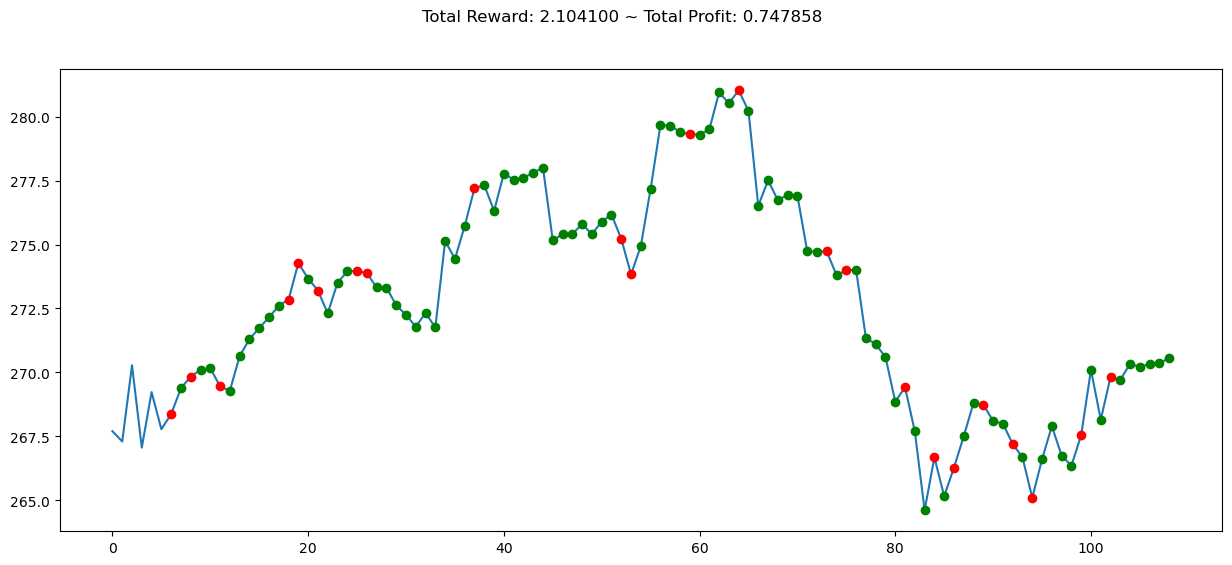

In [76]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [78]:
df2 = df.copy()
df2

,Open,High,Low,Close,Volume
Date,,,,,
2021-04-12,143.4250,143.4250,143.4250,143.4250,620.0
2021-04-12,143.4750,143.4750,143.1875,143.2500,2708.0
2021-04-12,143.1875,143.7500,143.1875,143.7500,14176.0
2021-04-12,143.7500,143.7500,143.4975,143.5000,21356.0
2021-04-12,143.3950,144.1225,141.9200,142.3975,3274688.0
...,...,...,...,...,...
2023-04-06,269.7400,270.7800,269.2000,270.3400,5011915.0
2023-04-06,270.3700,270.5000,268.5557,270.2100,1203194.0
2023-04-06,270.1946,270.4000,270.1700,270.3300,27828.0


In [79]:
df2['close_lag'] = df2.Close.shift(1)
df2['trend'] = df2[['Close', 'close_lag']].apply(lambda x: 1 if x.Close > x.close_lag else 0, axis=1)
df2    

,Open,High,Low,Close,Volume,close_lag,trend
Date,,,,,,,
2021-04-12,143.4250,143.4250,143.4250,143.4250,620.0,NaN,0
2021-04-12,143.4750,143.4750,143.1875,143.2500,2708.0,143.425,0
2021-04-12,143.1875,143.7500,143.1875,143.7500,14176.0,143.250,1
2021-04-12,143.7500,143.7500,143.4975,143.5000,21356.0,143.750,0
2021-04-12,143.3950,144.1225,141.9200,142.3975,3274688.0,143.500,0
...,...,...,...,...,...,...,...
2023-04-06,269.7400,270.7800,269.2000,270.3400,5011915.0,269.710,1
2023-04-06,270.3700,270.5000,268.5557,270.2100,1203194.0,270.340,0
2023-04-06,270.1946,270.4000,270.1700,270.3300,27828.0,270.210,1


In [80]:
env = gym.make('stocks-v0', df=df, frame_bound=(timesteps,df.shape[0]), window_size=timesteps)
obs = env.reset()

actions = []
rewards = [] 
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    actions.append(action[0])
    
    obs, reward, done, info = env.step(action)
    rewards.append(reward)
    if done:
        print("info", info)
        break

info {'total_reward': 111.01009999999958, 'total_profit': 8.704026886981936e-09, 'position': 1}


In [81]:
sum(actions)

6392

In [82]:
y_true = df2['trend'].values[(timesteps+1):]
len(y_true)

7996

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, actions)

array([[ 778, 3167],
       [ 826, 3225]])

In [84]:
# model2 = RecurrentPPO("MlpLstmPolicy", env, verbose=1)
# model2.learn(1000000)

In [85]:

# env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
# obs = env.reset()
# while True: 
#     obs = obs[np.newaxis, ...]
#     action, _states = model.predict(obs)
#     obs, rewards, done, info = env.step(action)
#     if done:
#         print("info", info)
#         break